<a href="https://colab.research.google.com/github/rishikesh28300/FakeJob/blob/main/Fake_job.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
# In[2]:


import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer # notice the spelling with the f before Vectorizer
from sklearn.naive_bayes import MultinomialNB # notice the Caps on the M
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
import spacy
from sklearn.feature_extraction import _stop_words
from spacy.lang.en import English

In [ ]:

df = pd.read_csv('/desktop/fake_job_postings(1).csv')


FileNotFoundError: [Errno 2] No such file or directory: '/desktop/fake_job_postings(1).csv'

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.shape

(17880, 18)

In [ ]:
df.isnull().sum()

,0
job_id,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0


In [ ]:
columns=['job_id','telecommuting','has_company_logo','has_questions','salary_range','employment_type']
for colu in columns:
    del df[colu]

In [ ]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.fillna('',inplace=True)

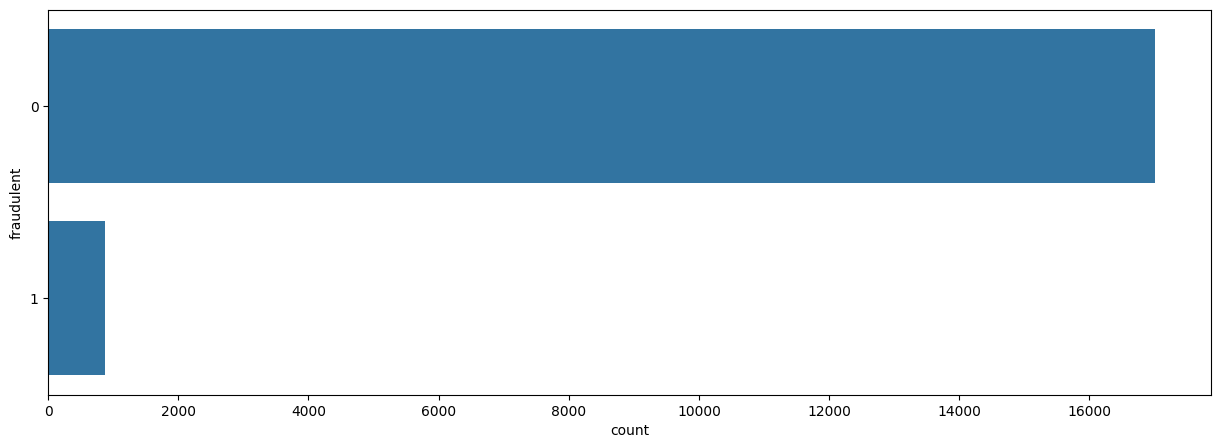

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent',data=df)
plt.show()

In [ ]:
df.groupby('fraudulent')['fraudulent'].count()

,fraudulent
fraudulent,
0,17014
1,866


In [ ]:
exp=dict(df.required_experience.value_counts())
del exp['']


In [ ]:
exp

{'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

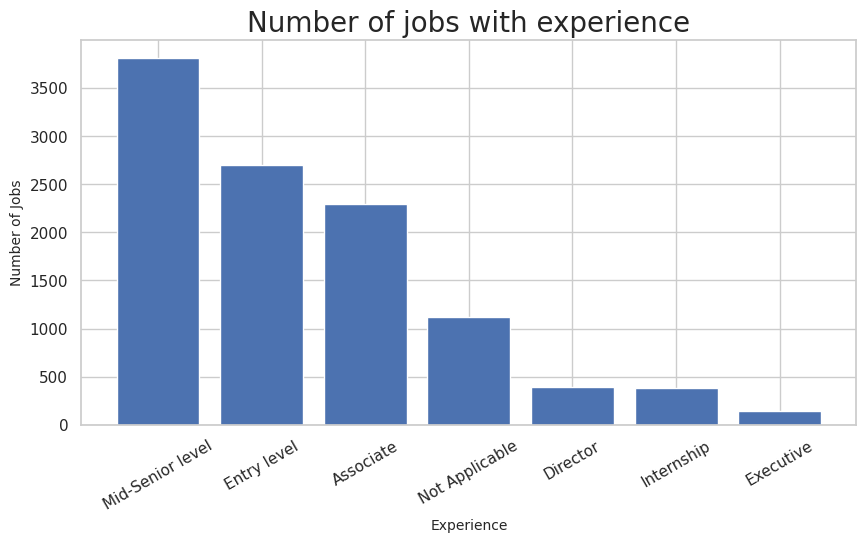

In [ ]:

plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')
plt.bar(exp.keys(),exp.values())
plt.title('Number of jobs with experience',size=20)
plt.xlabel('Experience',size=10)
plt.ylabel('Number of Jobs',size=10)
plt.xticks(rotation=30)
plt.show()

In [ ]:

def split(location):
    l =location.split(',')
    return l[0]
df['country']=df.location.apply(split)

In [ ]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [ ]:
countr=dict(df.country.value_counts()[:14])
del countr['']
countr

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127,
 'BE': 117,
 'IE': 114,
 'SG': 80}

Text(0.5, 0, 'Countries')

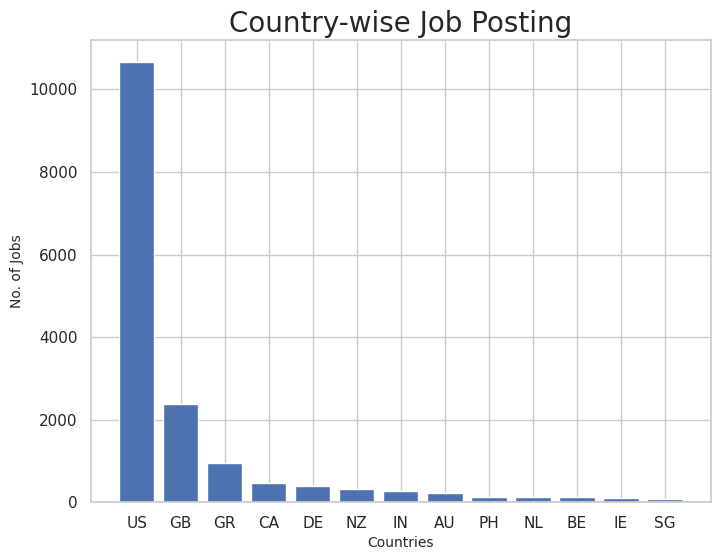

In [ ]:

plt.figure(figsize=(8,6))
plt.title('Country-wise Job Posting',size=20)
plt.bar(countr.keys(),countr.values())
plt.ylabel('No. of Jobs',size=10)
plt.xlabel('Countries',size=10)


In [ ]:
edu =dict(df.required_education.value_counts()[:7])
del edu['']
edu

{"Bachelor's Degree": 5145,
 'High School or equivalent': 2080,
 'Unspecified': 1397,
 "Master's Degree": 416,
 'Associate Degree': 274,
 'Certification': 170}

Text(0.5, 0, 'Education')

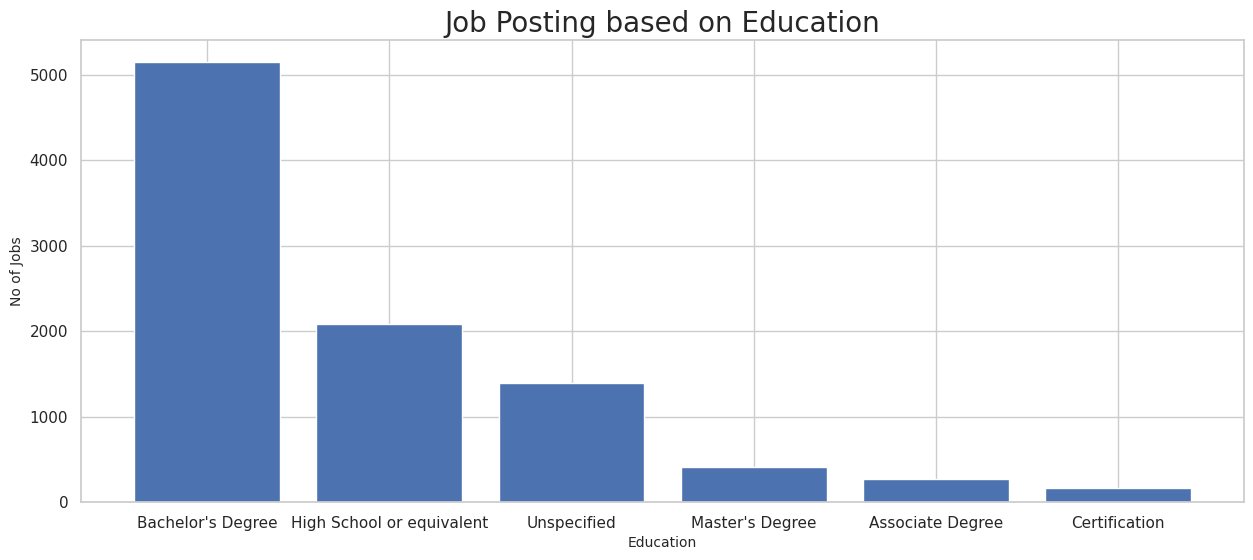

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Job Posting based on Education',size=20)
plt.bar(edu.keys(),edu.values())
plt.ylabel('No of Jobs',size=10)
plt.xlabel('Education',size=10)

In [ ]:
print(df[df.fraudulent==0].title.value_counts()[:10])



title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: count, dtype: int64


In [ ]:
print(df[df.fraudulent==1].title.value_counts()[:10])



title
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: count, dtype: int64


In [ ]:
df['text']=df['title']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['country']

In [ ]:
df.head()

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


In [ ]:
fraudjobs_text=df[df.fraudulent==1].text
realjobs_text=df[df.fraudulent==0].text


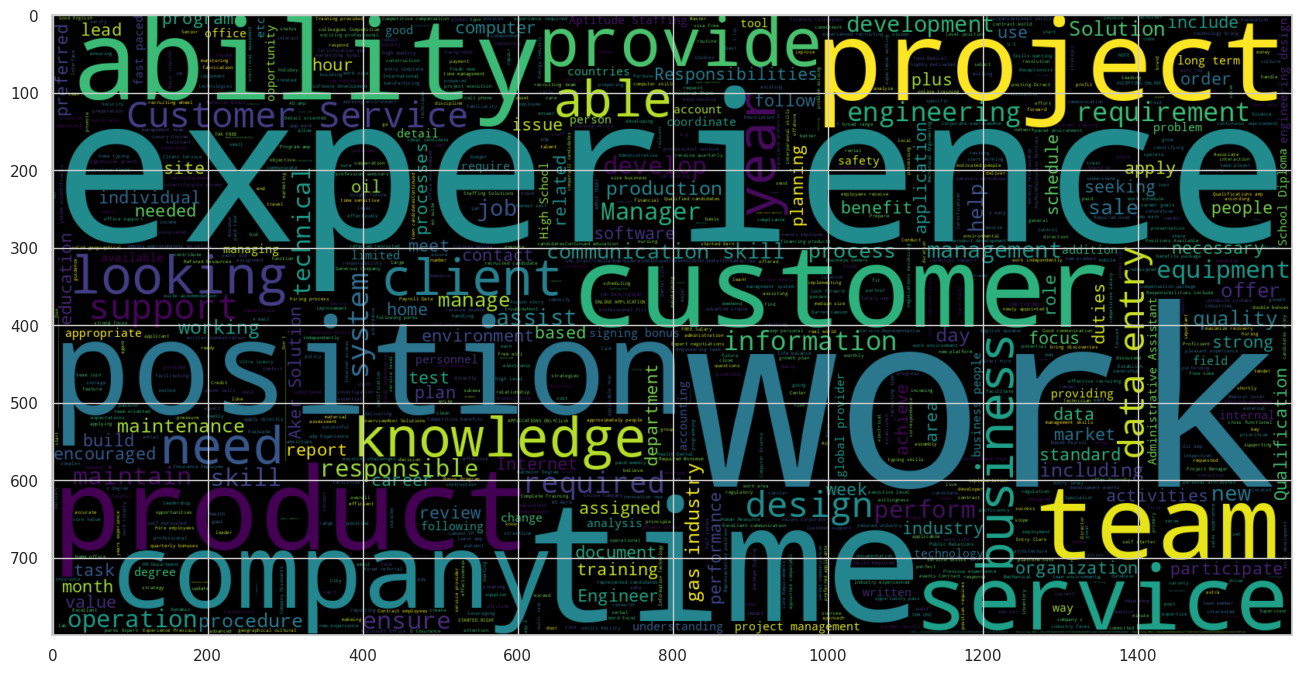

In [ ]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3, max_words = 3000 ,width = 1600, height =  800, stopwords =STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')


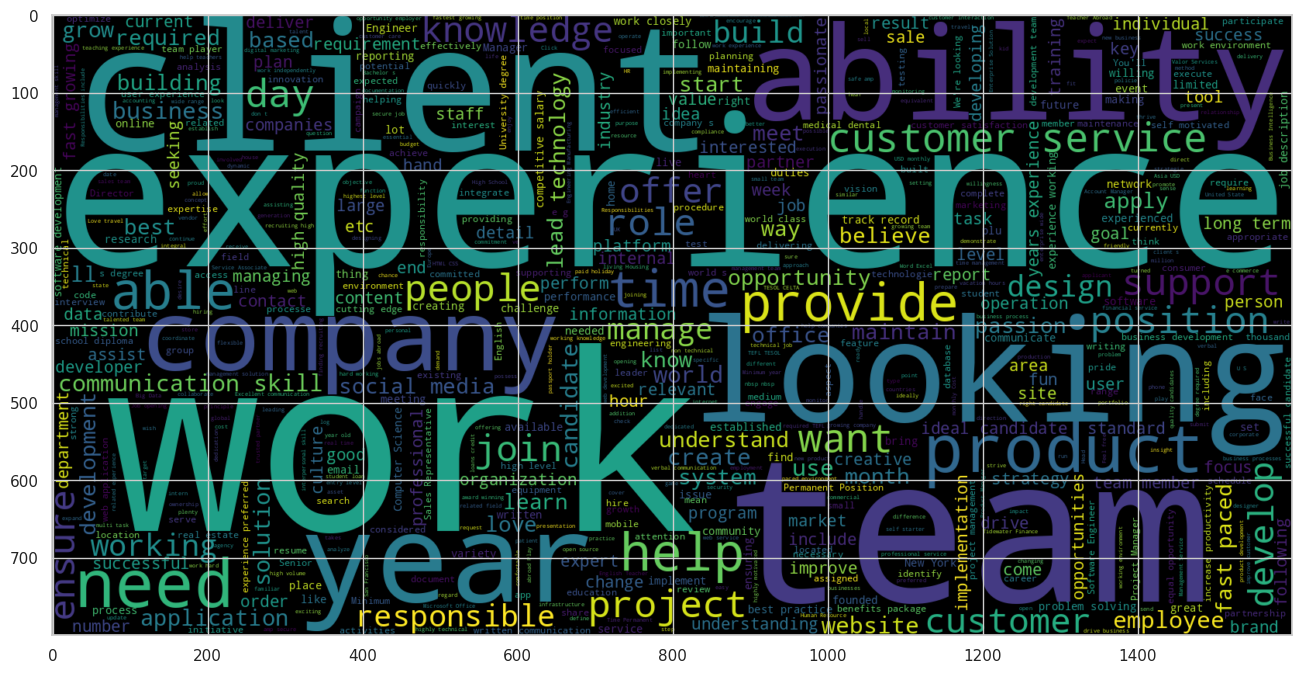

In [ ]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3, max_words = 3000 ,width = 1600, height =  800, stopwords =STOPWORDS).generate(str(" ".join(realjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

In [ ]:
punctuation = string.punctuation

nlp = spacy.load("en_core_web_sm")
stop_words =spacy.lang.en.stop_words.STOP_WORDS

parser = English()

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens =[ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    return mytokens

class predictors(TransformerMixin):
    def transform(self, X , **transform_params):

        return[clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

def clean_text(text):
    return text.strip().lower()


In [ ]:
df['text']= df['text'].apply(clean_text)

In [ ]:
cv = TfidfVectorizer(max_features = 100)
x = cv.fit_transform(df['text'])
df1 = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())
df.drop(["text"],axis=1, inplace =True)
main_df = pd.concat([df1,df], axis =1)


In [ ]:
main_df.head()

,ability,about,all,also,amp,an,and,are,as,at,...,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.041123,0.000000,0.042423,0.036488,0.000000,0.755236,0.000000,0.078657,0.000000,...,0.000000,0.000000,0.186067,0.051026,0.068034,0.000000,0.000000,0.000000,0.000000,0
1,0.021896,0.094190,0.035396,0.024292,0.041787,0.029771,0.490894,0.056626,0.060053,0.052431,...,0.000000,0.078004,0.165734,0.043827,0.116870,0.099327,0.000000,0.204853,0.130451,0
2,0.000000,0.000000,0.176818,0.000000,0.041749,0.089230,0.397028,0.113149,0.000000,0.000000,...,0.000000,0.062346,0.307511,0.058382,0.000000,0.000000,0.000000,0.094462,0.074476,0
3,0.023268,0.000000,0.018807,0.000000,0.000000,0.094908,0.695540,0.000000,0.031908,0.037144,...,0.023132,0.049735,0.075480,0.046573,0.000000,0.105551,0.019809,0.050236,0.059411,0
4,0.000000,0.000000,0.068013,0.000000,0.040147,0.028602,0.606377,0.081605,0.115392,0.000000,...,0.000000,0.000000,0.159229,0.028071,0.037428,0.000000,0.035818,0.030279,0.107427,0


In [ ]:

Y = main_df.iloc[:,-1]
X = main_df.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)


(12516, 100)
(12516,)
(12516, 100)
(5364,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
model=rfc.fit(X_train,y_train)

In [ ]:
print(X_test)

        ability     about       all      also       amp        an       and  \
10341  0.000000  0.055726  0.062824  0.057488  0.000000  0.035226  0.221278   
6837   0.000000  0.105830  0.119310  0.000000  0.000000  0.066899  0.183852   
12977  0.046794  0.050323  0.113465  0.000000  0.044651  0.095433  0.474583   
2829   0.048342  0.051987  0.019536  0.026815  0.000000  0.065726  0.322551   
54     0.000000  0.000000  0.000000  0.183069  0.000000  0.157050  0.369947   
...         ...       ...       ...       ...       ...       ...       ...   
11533  0.000000  0.088374  0.132840  0.091168  0.000000  0.000000  0.263189   
3914   0.000000  0.133053  0.000000  0.000000  0.039352  0.028036  0.374236   
12130  0.000000  0.067049  0.000000  0.000000  0.000000  0.000000  0.399360   
8577   0.000000  0.000000  0.063008  0.000000  0.000000  0.026497  0.644978   
9941   0.000000  0.000000  0.075295  0.155024  0.000000  0.126657  0.522121   

            are        as        at  ...      well 

In [ ]:
pred = rfc.predict(X_test)
score = accuracy_score(y_test,pred)
score

0.9716629381058911

In [ ]:
print("Classification Report\n")
print(classification_report(y_test,pred))
print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred))


Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5099
           1       1.00      0.43      0.60       265

    accuracy                           0.97      5364
   macro avg       0.99      0.71      0.79      5364
weighted avg       0.97      0.97      0.97      5364

Confusion Matrix

[[5099    0]
 [ 152  113]]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_test,y_test)

[Text(0.8550128191213255, 0.9852941176470589, 'x[30] <= 0.218\ngini = 0.094\nsamples = 5364\nvalue = [5099, 265]'),
 Text(0.734398457283321, 0.9558823529411765, 'x[71] <= 0.174\ngini = 0.086\nsamples = 5321\nvalue = [5082, 239]'),
 Text(0.7947056382023232, 0.9705882352941178, 'True  '),
 Text(0.5617182871591958, 0.9264705882352942, 'x[51] <= 0.06\ngini = 0.074\nsamples = 5196\nvalue = [4995.0, 201.0]'),
 Text(0.34617614583228734, 0.8970588235294118, 'x[16] <= 0.184\ngini = 0.274\nsamples = 263\nvalue = [220, 43]'),
 Text(0.32066085089908614, 0.8676470588235294, 'x[31] <= 0.091\ngini = 0.235\nsamples = 250\nvalue = [216, 34]'),
 Text(0.287909875313186, 0.8382352941176471, 'x[80] <= 0.051\ngini = 0.172\nsamples = 211\nvalue = [191, 20]'),
 Text(0.2620137550824743, 0.8088235294117647, 'x[21] <= 0.262\ngini = 0.335\nsamples = 61\nvalue = [48, 13]'),
 Text(0.2559205503223069, 0.7794117647058824, 'x[57] <= 0.043\ngini = 0.285\nsamples = 58\nvalue = [48, 10]'),
 Text(0.24373414080197195, 0.75

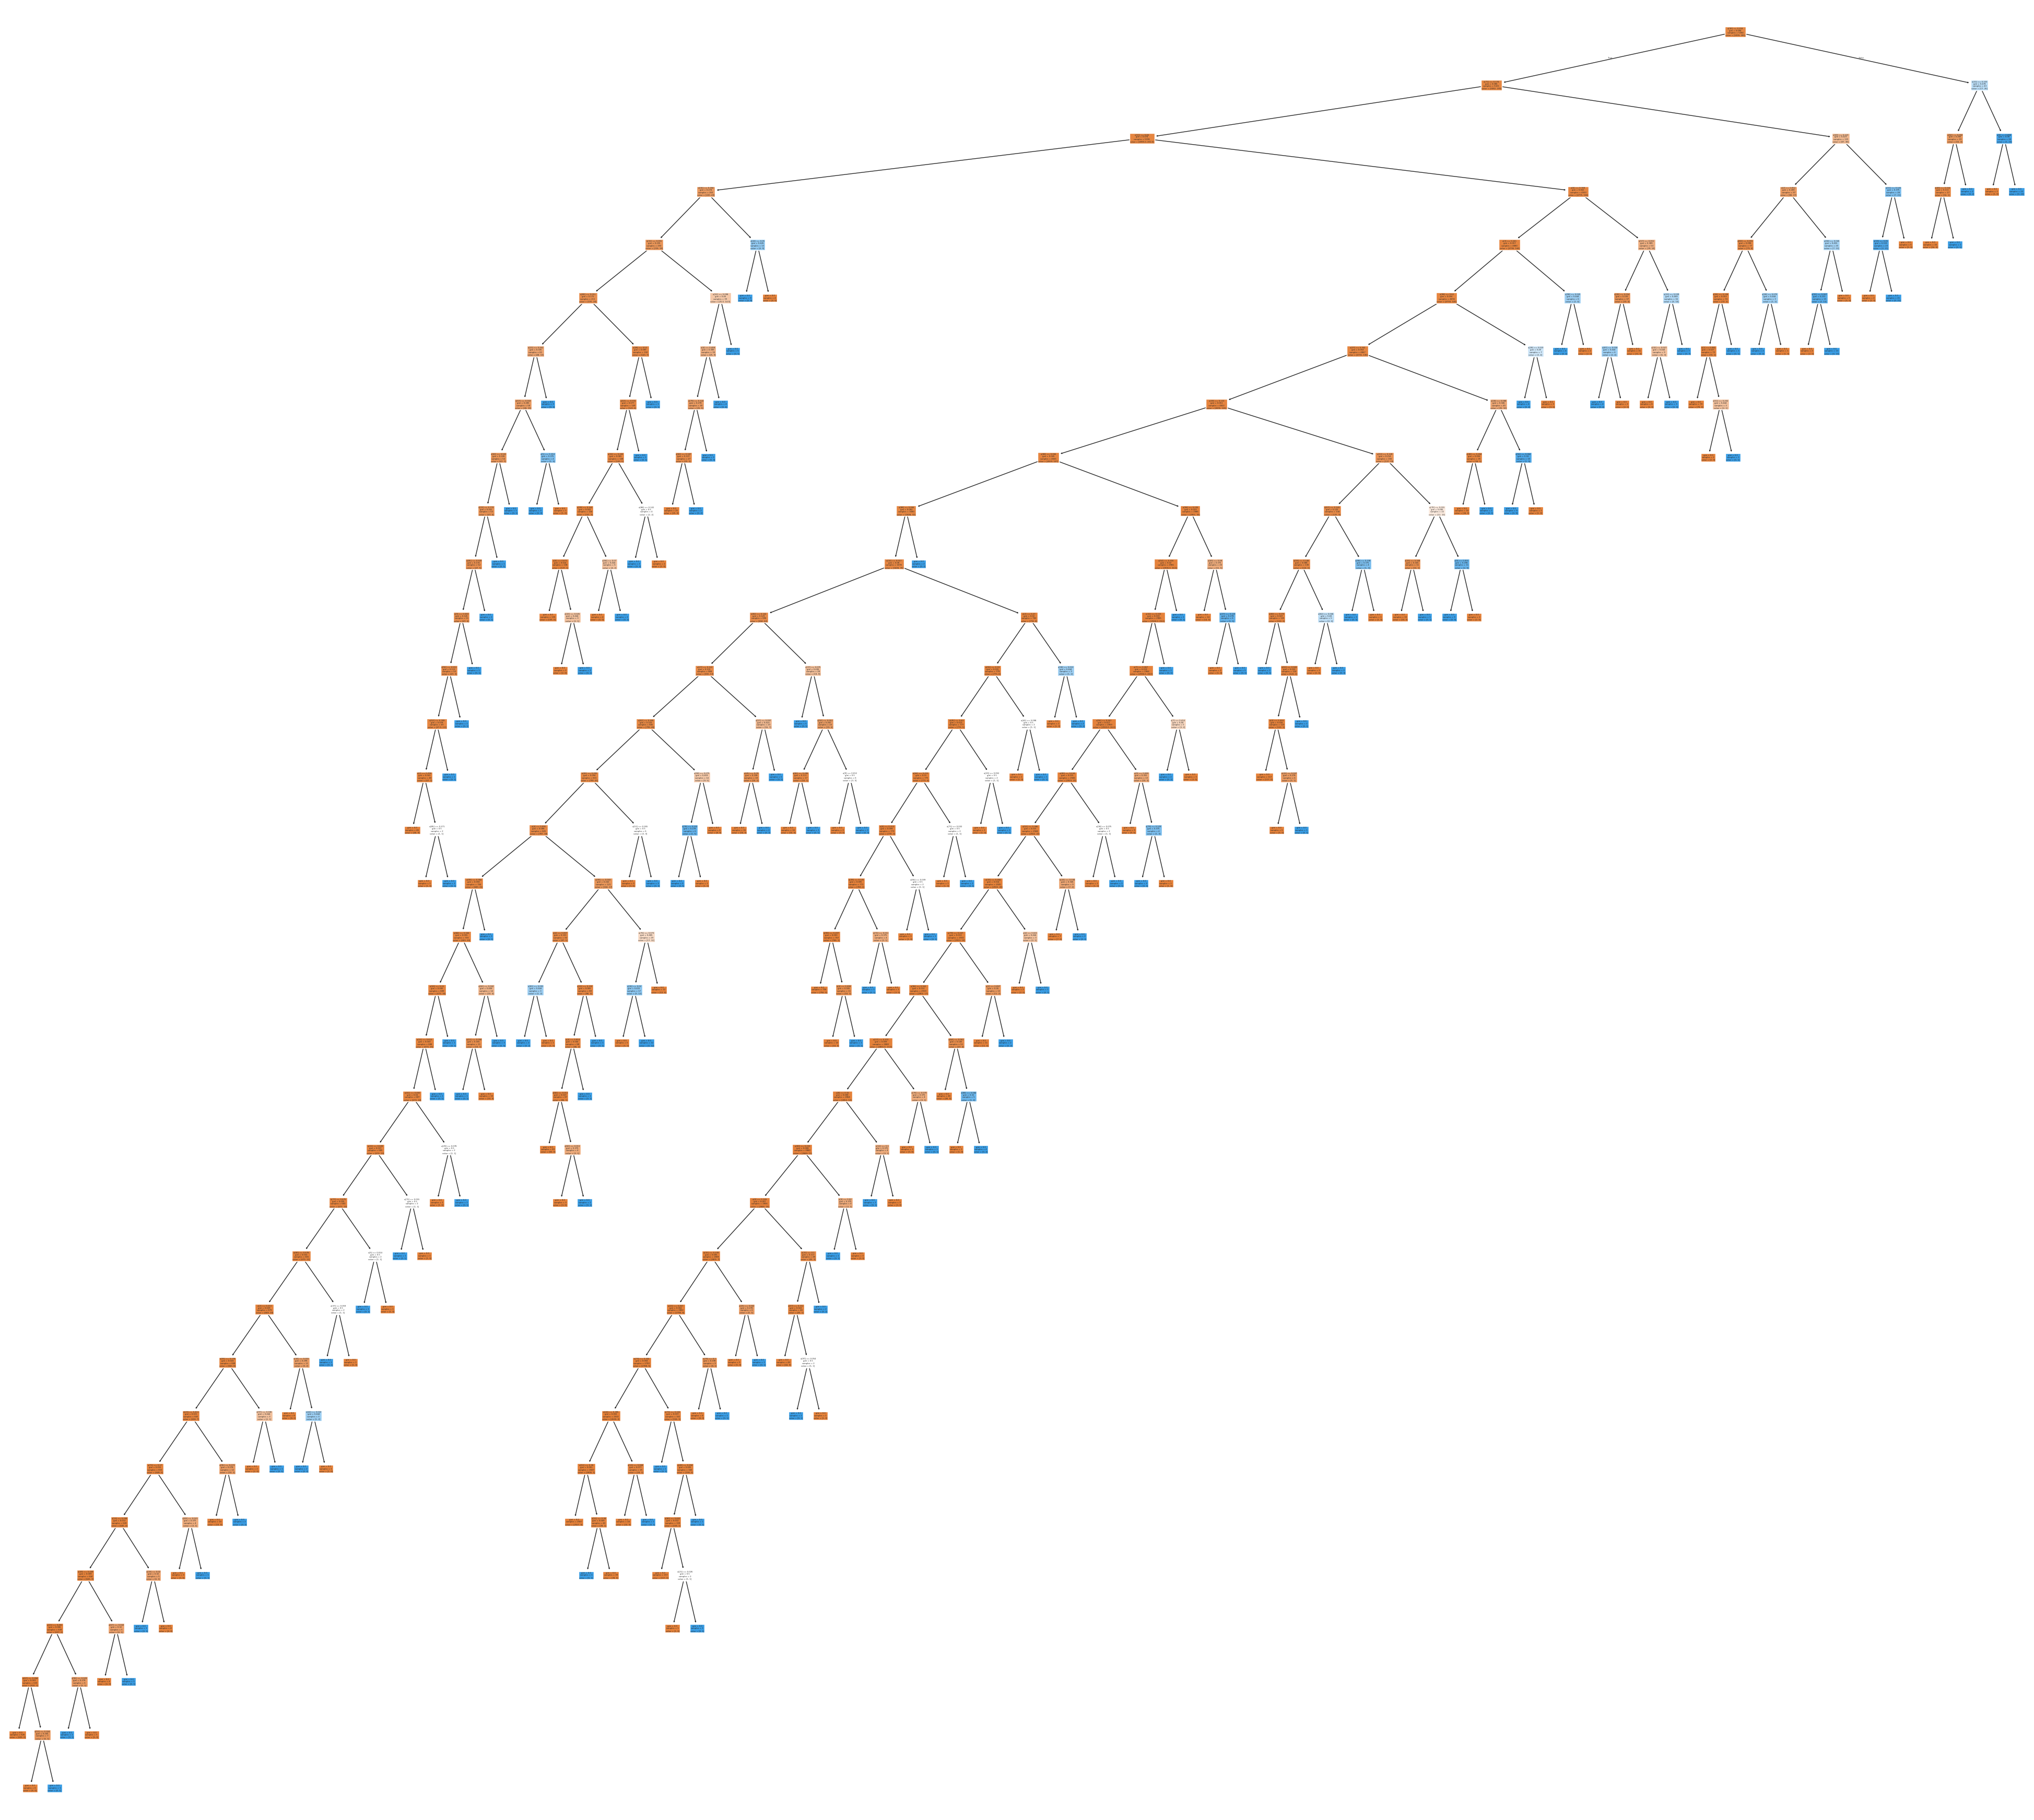

In [ ]:
plt.figure(figsize=(50,45))
tree.plot_tree(clf,filled=True)